In [111]:
import pandas as pd
import MySQLdb
import numpy as np
from sqlalchemy import create_engine
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [112]:
# DB Connection
myvars = {}
with open("../risaac-mysql-password") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()

In [113]:
myvars['DB databasename'] = 'I501saptpurkFall22grp_06_db'

In [114]:
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()

In [115]:
df_p_hiq = pd.read_sql('select * from P_HIQ', conn)

/usr/local/lib/python3.10/dist-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [116]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011         0
HIQ032A     8457
HIQ032B    12968
HIQ032C    15462
HIQ032D    11381
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

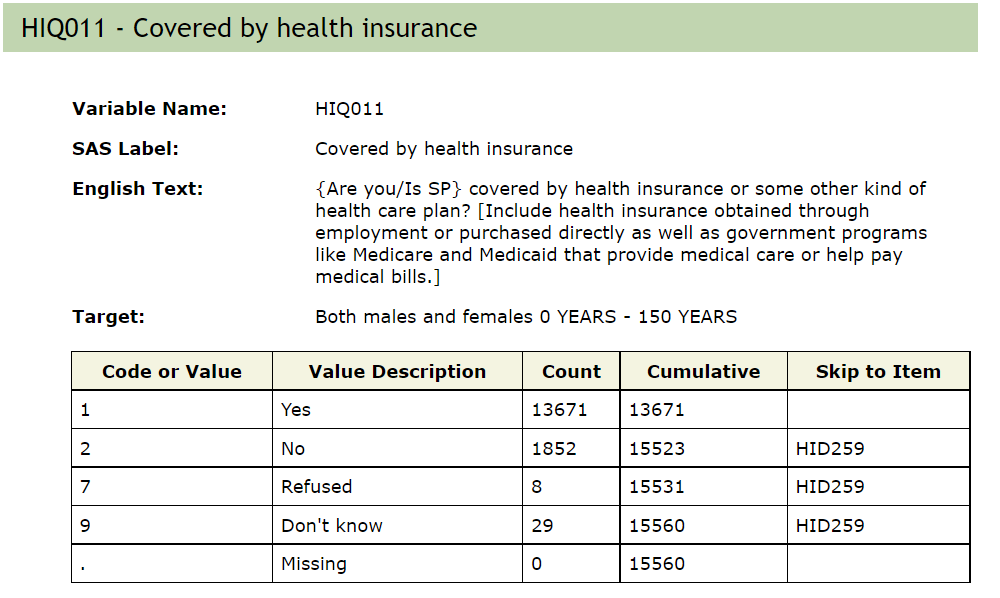

In [117]:
# classes 7,9 provide no information and can be considered nulls
df_p_hiq.loc[df_p_hiq["HIQ011"].isin([7,9]), "HIQ011"] = np.nan

In [118]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A     8457
HIQ032B    12968
HIQ032C    15462
HIQ032D    11381
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

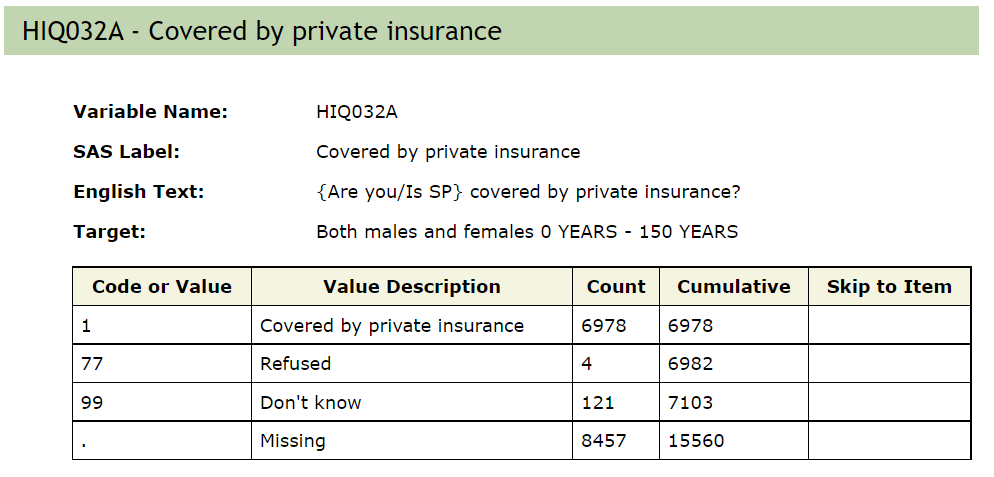

In [119]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032A"] == 1]["HIQ011"].value_counts()

1.0    6978
Name: HIQ011, dtype: int64

In [120]:
# new class for missing - assumption -> they are not covered private insurance
df_p_hiq["HIQ032A"] = df_p_hiq["HIQ032A"].replace(np.nan, 2)

In [121]:
# classes 7,9 provide no information and can be considered nulls
df_p_hiq.loc[df_p_hiq["HIQ032A"].isin([77,99]), "HIQ032A"] = np.nan

In [122]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B    12968
HIQ032C    15462
HIQ032D    11381
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

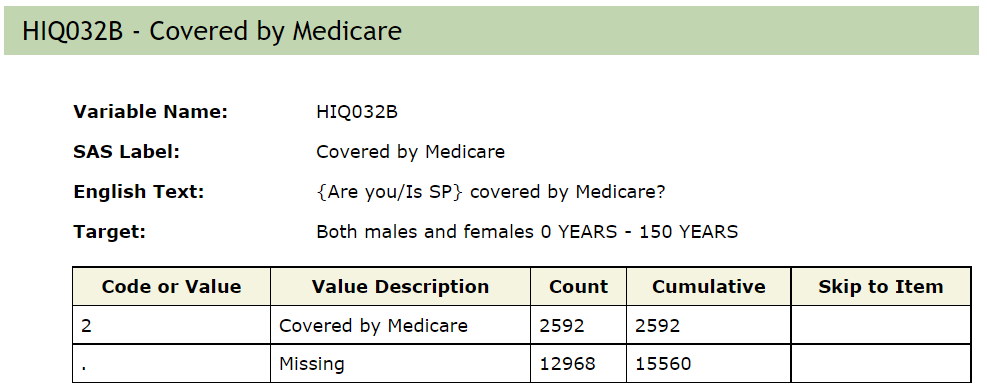

In [123]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032B"] == 2]["HIQ011"].value_counts()

1.0    2592
Name: HIQ011, dtype: int64

In [124]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032B"] == 2, "HIQ032B"] = 1

In [125]:
# new class for missing - assumption -> they are not covered
df_p_hiq["HIQ032B"] = df_p_hiq["HIQ032B"].replace(np.nan, 0)

In [126]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C    15462
HIQ032D    11381
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

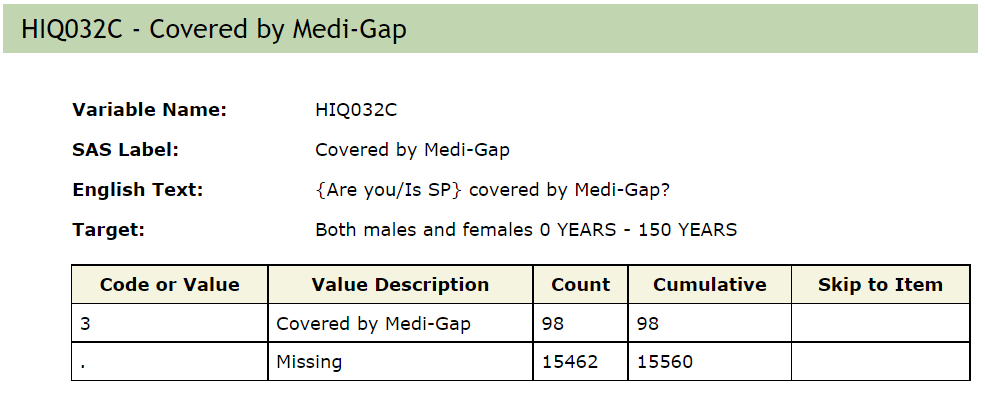

In [127]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032C"] == 3]["HIQ011"].value_counts()

1.0    98
Name: HIQ011, dtype: int64

In [128]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032C"] == 3, "HIQ032C"] = 1

In [129]:
# new class for missing - assumption -> they are not covered
df_p_hiq["HIQ032C"] = df_p_hiq["HIQ032C"].replace(np.nan, 0)

In [130]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D    11381
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

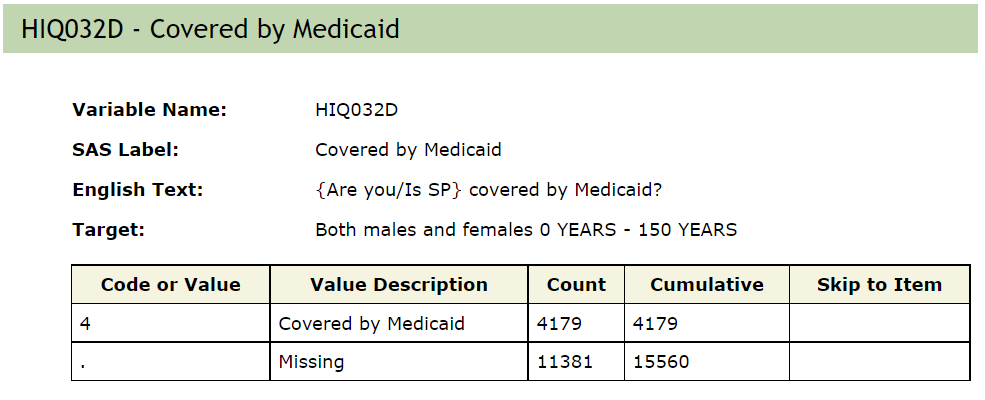

In [131]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032D"] == 4]["HIQ032D"].value_counts()

4.0    4179
Name: HIQ032D, dtype: int64

In [132]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032D"] == 4, "HIQ032D"] = 1

In [133]:
# new class for missing - assumption -> they are not covered
df_p_hiq["HIQ032D"] = df_p_hiq["HIQ032D"].replace(np.nan, 0)

In [134]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D        0
HIQ032E    15389
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

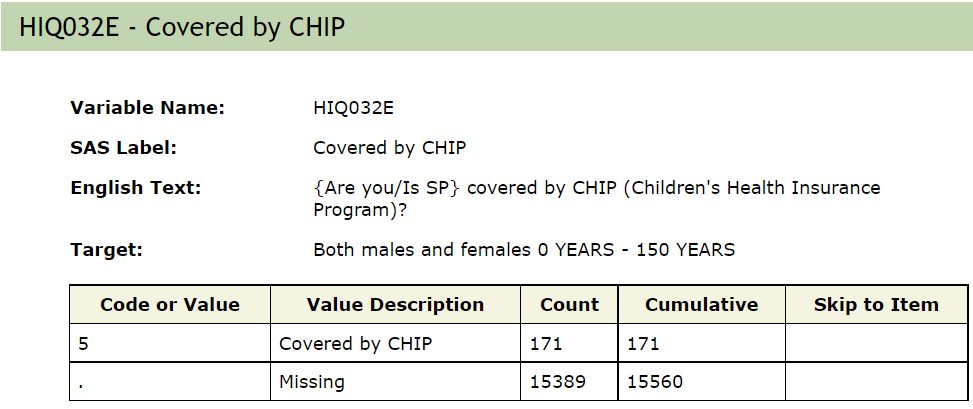

In [135]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032E"] == 5]["HIQ032E"].value_counts()

5.0    171
Name: HIQ032E, dtype: int64

In [136]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032E"] == 5, "HIQ032E"] = 1

In [137]:
# new class for missing - assumption -> they are not covered
df_p_hiq["HIQ032E"] = df_p_hiq["HIQ032E"].replace(np.nan, 0)

In [138]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D        0
HIQ032E        0
HIQ032H    14623
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

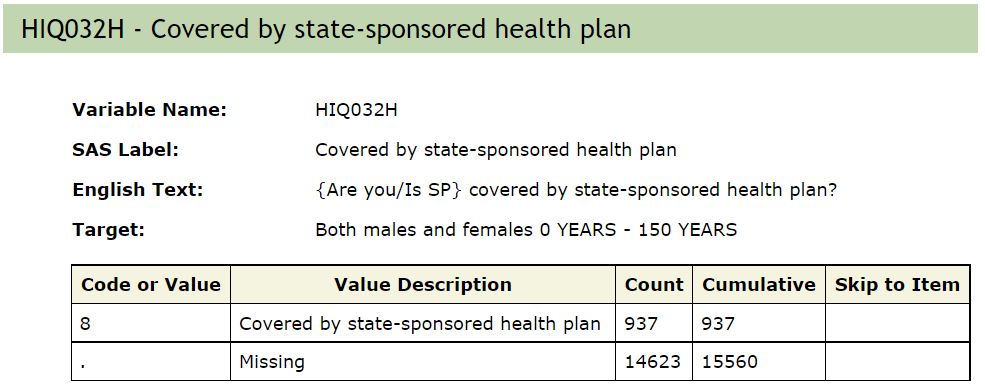

In [139]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032H"] == 8]["HIQ032H"].value_counts()

8.0    937
Name: HIQ032H, dtype: int64

In [140]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032H"] == 8, "HIQ032H"] = 1

In [141]:
# new class for missing - assumption -> they are not covered 
df_p_hiq["HIQ032H"] = df_p_hiq["HIQ032H"].replace(np.nan, 0)

In [142]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D        0
HIQ032E        0
HIQ032H        0
HIQ032I    14552
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

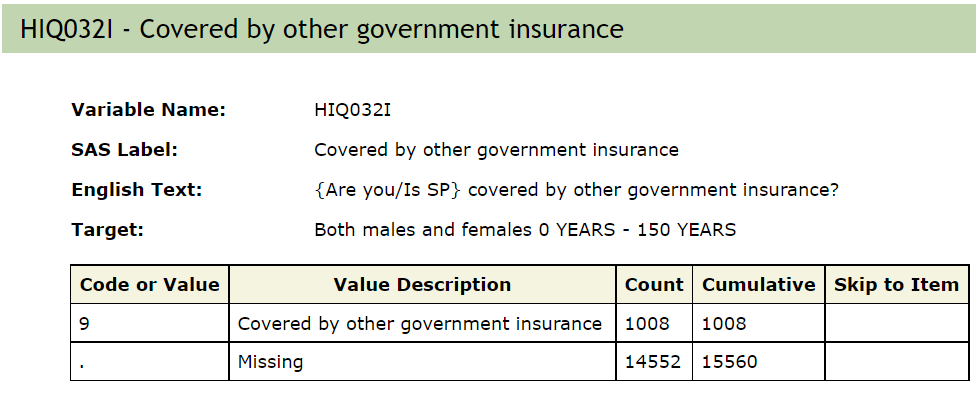

In [143]:
# check for data consistency
df_p_hiq[df_p_hiq["HIQ032I"] == 9]["HIQ032I"].value_counts()

9.0    1008
Name: HIQ032I, dtype: int64

In [144]:
# change class to binary
df_p_hiq.loc[df_p_hiq["HIQ032I"] == 9, "HIQ032I"] = 1

In [145]:
# new class for missing - assumption -> they are not covered private insurance
df_p_hiq["HIQ032I"] = df_p_hiq["HIQ032I"].replace(np.nan, 0)

In [146]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D        0
HIQ032E        0
HIQ032H        0
HIQ032I        0
HIQ032J    15558
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

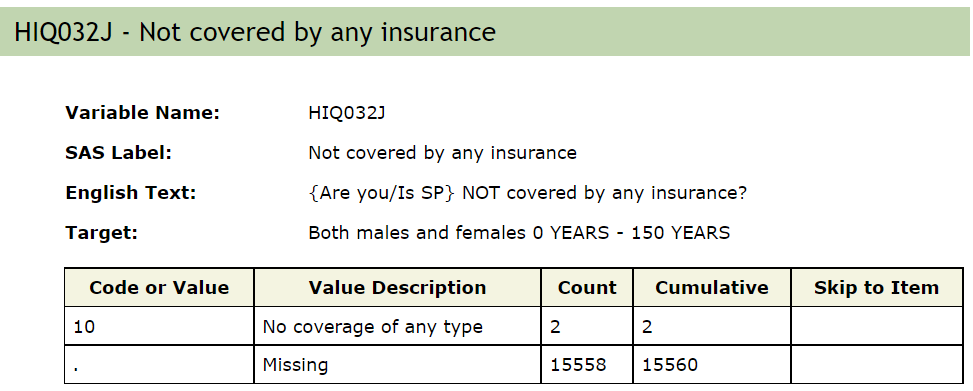

In [147]:
# the feature is highly imbalanced and contradicts feature HIQ011 (Covered by health insurance)
# we will drop the feature
df_p_hiq = df_p_hiq.drop("HIQ032J", axis = 1)

In [148]:
df_p_hiq.isna().sum()

hiq_key        0
SEQN           0
HIQ011        37
HIQ032A      125
HIQ032B        0
HIQ032C        0
HIQ032D        0
HIQ032E        0
HIQ032H        0
HIQ032I        0
HIQ260     15286
HIQ105     13612
HIQ270      1865
HIQ210      1865
dtype: int64

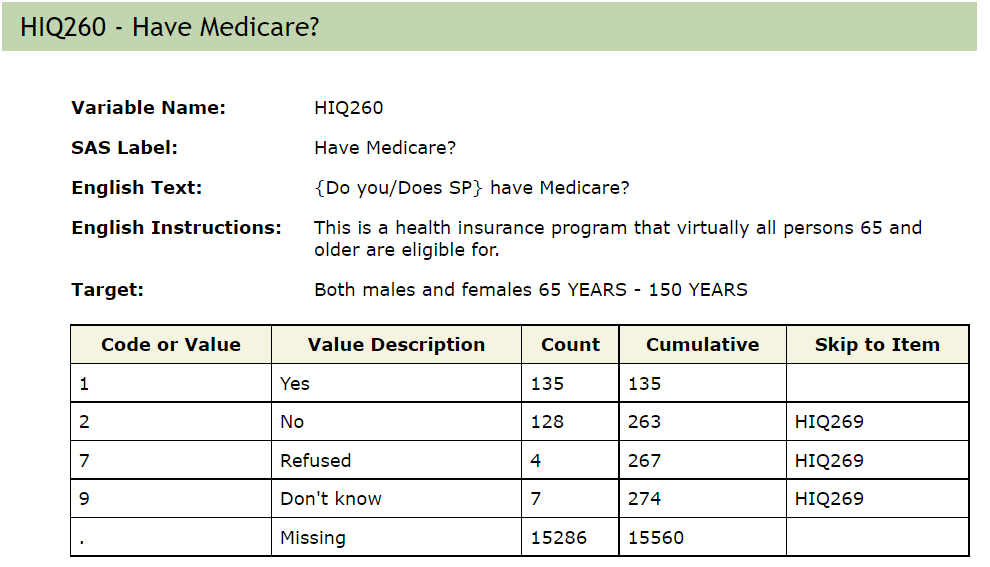

In [149]:
# the feature is not useful since it contradicts feature HIQ032B (Covered by Medicare)
df_p_hiq = df_p_hiq.drop("HIQ260", axis = 1)

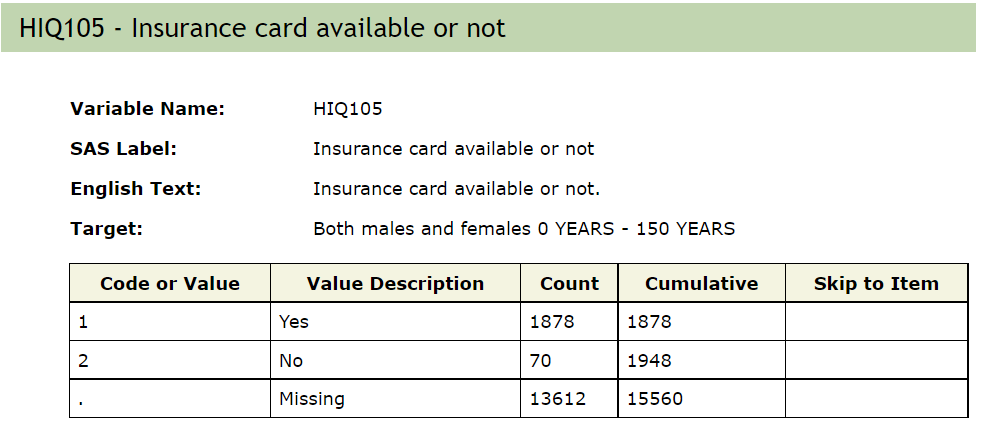

In [150]:
# the feature may not be useful since it has lot of missing values
df_p_hiq = df_p_hiq.drop("HIQ105", axis = 1)

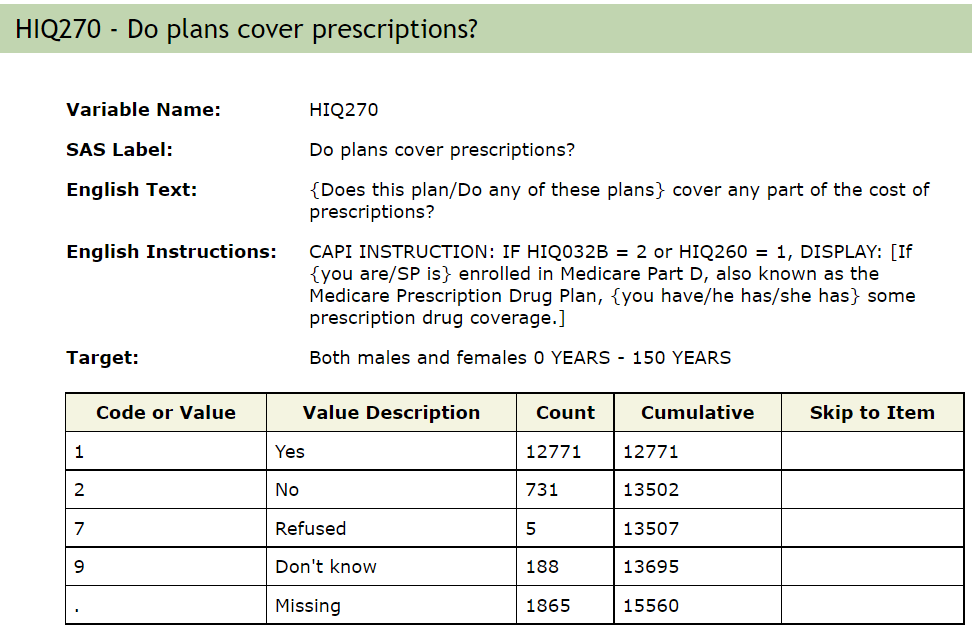

In [151]:
# check if majority missing values are people who do not have insurance

df_p_hiq[df_p_hiq["HIQ270"].isna()]["HIQ011"].value_counts(dropna = False)

# we see majority are people who are not covered by insurance and people who refused/dont know

2.0    1826
NaN      37
1.0       2
Name: HIQ011, dtype: int64

In [152]:
# the respondents who had insurance but no prescriptions
df_p_hiq[df_p_hiq["HIQ270"].isna()][df_p_hiq[df_p_hiq["HIQ270"].isna()]["HIQ011"] == 1]

# they seem to have covered by private insurance, we can remove them as they are just 2 rows

,hiq_key,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032H,HIQ032I,HIQ270,HIQ210
10754,10754,120017,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13561,13561,122824,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [153]:
df_p_hiq = df_p_hiq[~df_p_hiq["SEQN"].isin([120017, 122824])]

In [154]:
# impute other values as a separate class
df_p_hiq.loc[df_p_hiq["HIQ270"].isna(), "HIQ270"] = 3

In [155]:
# classes 7,9 provide no information and can be considered nulls
df_p_hiq.loc[df_p_hiq["HIQ270"].isin([7,9]), "HIQ270"] = np.nan

In [156]:
df_p_hiq.isna().sum()

hiq_key       0
SEQN          0
HIQ011       37
HIQ032A     125
HIQ032B       0
HIQ032C       0
HIQ032D       0
HIQ032E       0
HIQ032H       0
HIQ032I       0
HIQ270      193
HIQ210     1863
dtype: int64

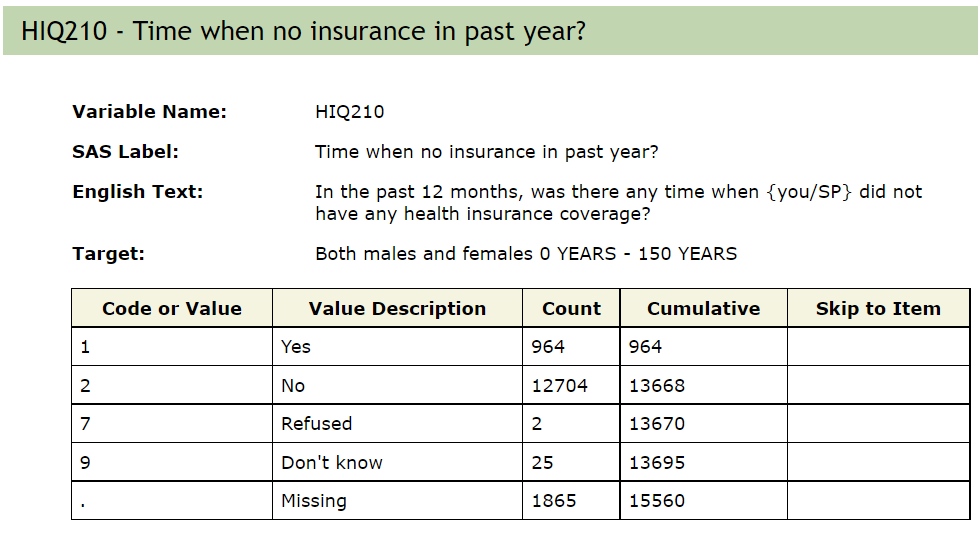

In [157]:
# check if majority missing values are people who do not have insurance

df_p_hiq[df_p_hiq["HIQ210"].isna()]["HIQ011"].value_counts(dropna = False)

# we see majority are people who are not covered by insurance and people who refused/dont know

2.0    1826
NaN      37
Name: HIQ011, dtype: int64

In [158]:
# impute other values as a separate class
df_p_hiq.loc[df_p_hiq["HIQ210"].isna(), "HIQ210"] = 3

In [159]:
# classes 7,9 provide no information and can be considered nulls
df_p_hiq.loc[df_p_hiq["HIQ210"].isin([7,9]), "HIQ210"] = np.nan

In [160]:
df_p_hiq.isna().sum()

hiq_key      0
SEQN         0
HIQ011      37
HIQ032A    125
HIQ032B      0
HIQ032C      0
HIQ032D      0
HIQ032E      0
HIQ032H      0
HIQ032I      0
HIQ270     193
HIQ210      27
dtype: int64

In [166]:
df_p_hiq

,hiq_key,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032H,HIQ032I,HIQ270,HIQ210
0,0,109263,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1,109264,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
2,2,109265,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
3,3,109266,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,4,109267,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15555,15555,124818,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
15556,15556,124819,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
15557,15557,124820,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0
15558,15558,124821,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0


In [168]:
my_conn = create_engine(f"mysql+mysqldb://{myvars['DB username']}:{myvars['DB password']}@localhost/{myvars['DB databasename']}") #fill details

In [164]:
cols = ['SEQN'
        ,'HUQ010'
        ,'HUQ030'
        ,'HUQ071'
        ,'HUQ090'
       ]

for col in cols:
    if col in df_p_hiq.columns:
        df_p_hiq[col] = df_p_hiq[col].astype("Int32")

In [165]:
cols = ['HUQ051'
       ,'HUD062']

for col in cols:
    if col in df_p_hiq.columns:
        df_p_hiq[col] = df_p_hiq[col].astype("Int32")

In [169]:
name = "P_HIQ_preprocess"
df_p_hiq.to_sql(name, con = my_conn, if_exists = 'replace', index = False)

15558